In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lagos-flood-prediction/lagos_weather.csv
/kaggle/input/lagos-flood-prediction/lagos_flood_data.csv
/kaggle/input/new-test-flood-data/new_test_flood_data.csv


In [2]:
# Load the flood data
flood_data = pd.read_csv('/kaggle/input/lagos-flood-prediction/lagos_flood_data.csv')

# Load the monthly weather data
weather_data = pd.read_csv('/kaggle/input/lagos-flood-prediction/lagos_weather.csv')

# Display basic statistics
print(flood_data.describe())
print(weather_data.describe())

# Check for missing values
print(flood_data.isnull().sum())
print(weather_data.isnull().sum())

       Highest_Point  Lowest_Point  Land_Area_At_High_Flood_Risk  \
count      15.000000     15.000000                     15.000000   
mean       48.266667     -8.933333                     41.488667   
std        15.781846      9.974730                     61.622874   
min        29.000000    -25.000000                      0.000000   
25%        34.000000    -16.000000                      1.145000   
50%        45.000000     -8.000000                     12.030000   
75%        60.500000     -4.000000                     40.610000   
max        76.000000     13.000000                    194.380000   

       Total_Land_Area  Percentage_Of_Land_Area_At_High_Flood_Risk  \
count        15.000000                                   15.000000   
mean        129.004667                                   27.444667   
std         173.621871                                   24.108382   
min          16.580000                                    0.000000   
25%          26.750000               

In [3]:
# Function to extract months from 'Recent_Flood_Dates' column
def extract_months(dates):
    date_list = dates.split(', ')
    return [pd.to_datetime(date).strftime('%B') for date in date_list]

# Apply the function to the 'Recent_Flood_Dates' column
flood_data['Months'] = flood_data['Recent_Flood_Dates'].apply(extract_months)

# Explode the list of months into separate rows
flood_data_exploded = flood_data.explode('Months')

# Merge datasets based on the 'Months' column
merged_data = pd.merge(flood_data_exploded, weather_data, left_on='Months', right_on='Month', how='left')

# Drop the duplicate 'Month' column from the right dataframe
merged_data = merged_data.drop(columns=['Month'])

print(merged_data.head())

           LGAs  Highest_Point  Lowest_Point  Land_Area_At_High_Flood_Risk  \
0  Ifako_Ijaiye             76             3                          0.18   
1  Ifako_Ijaiye             76             3                          0.18   
2  Ifako_Ijaiye             76             3                          0.18   
3         Agege             65            13                          0.00   
4         Agege             65            13                          0.00   

   Total_Land_Area  Percentage_Of_Land_Area_At_High_Flood_Risk  \
0            33.62                                        0.54   
1            33.62                                        0.54   
2            33.62                                        0.54   
3            16.58                                        0.00   
4            16.58                                        0.00   

                   Recent_Flood_Dates  Number_Of_Flood_Events  Longitude  \
0  2011-07-01, 2015-06-01, 2019-10-01                     

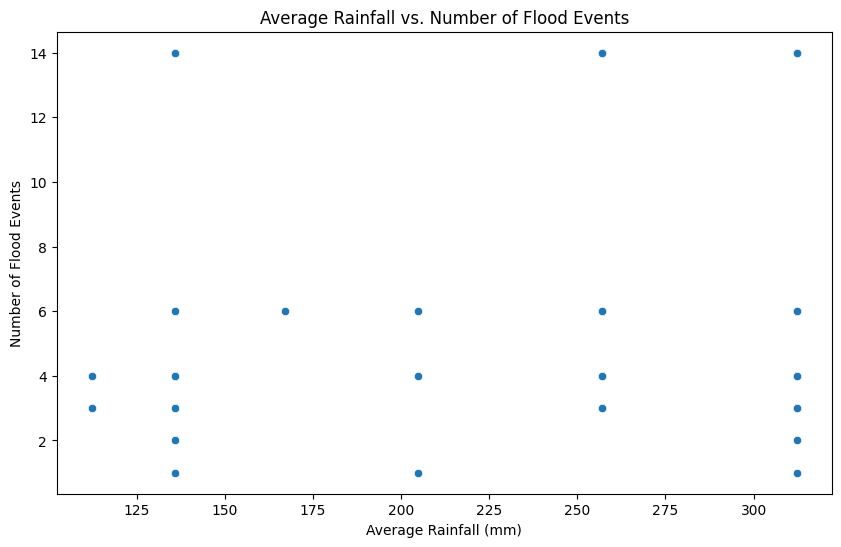

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Rainfall vs. Flood Events
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_rainfall', y='Number_Of_Flood_Events', data=merged_data)
plt.title('Average Rainfall vs. Number of Flood Events')
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Number of Flood Events')
plt.show()

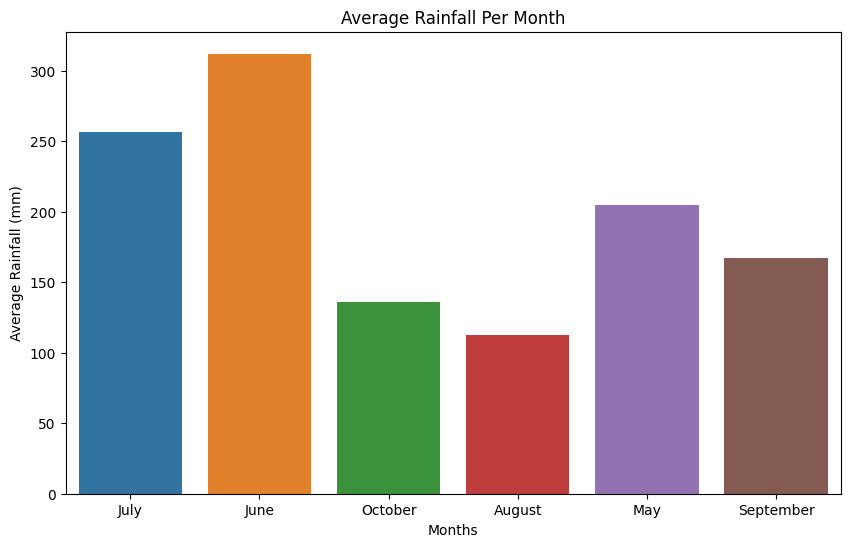

In [9]:
# Scatter plot of Rainfall vs. Flood Events
plt.figure(figsize=(10, 6))
sns.barplot(x='Months', y='Average_rainfall', data=merged_data)
plt.title('Average Rainfall Per Month')
plt.xlabel('Months')
plt.ylabel('Average Rainfall (mm)')
plt.show()

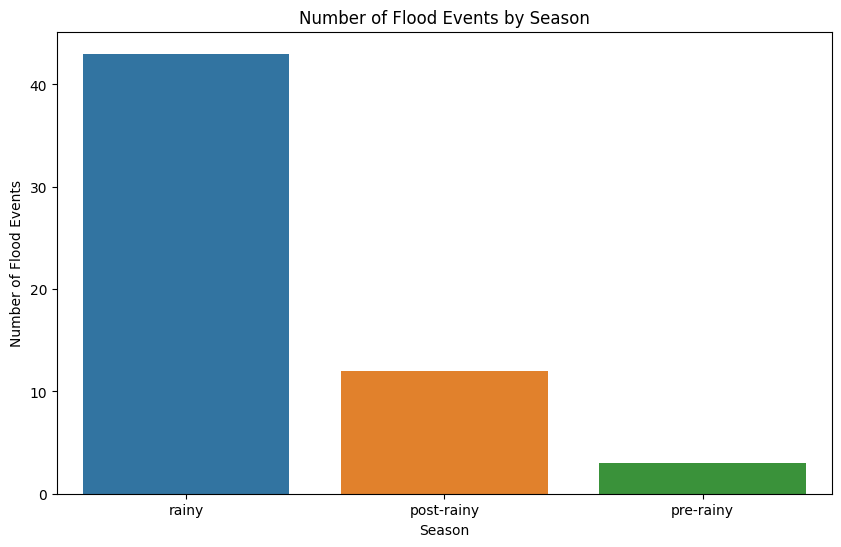

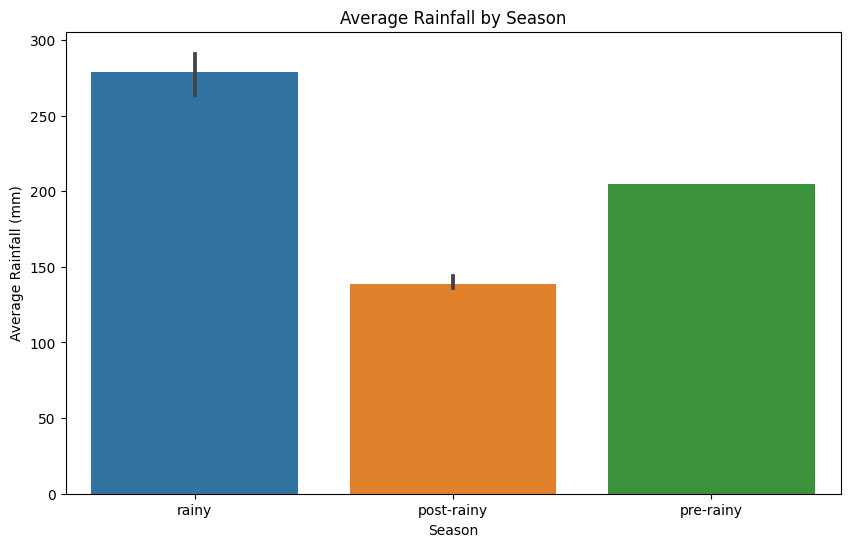

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot number of flood events by season
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=merged_data)
plt.title('Number of Flood Events by Season')
plt.xlabel('Season')
plt.ylabel('Number of Flood Events')
plt.show()

# Plot average rainfall by season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Average_rainfall', data=merged_data)
plt.title('Average Rainfall by Season')
plt.xlabel('Season')
plt.ylabel('Average Rainfall (mm)')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


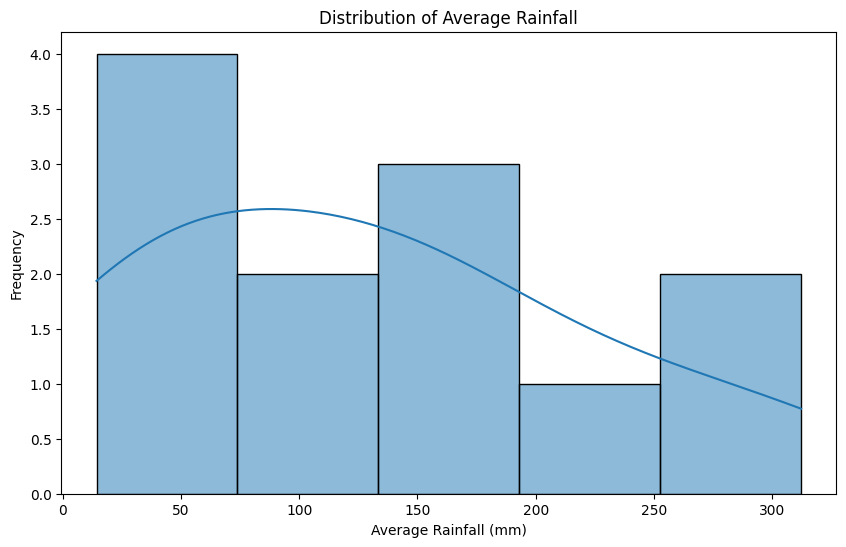

In [12]:
# Histogram of Average Rainfall
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['Average_rainfall'], kde=True)
plt.title('Distribution of Average Rainfall')
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

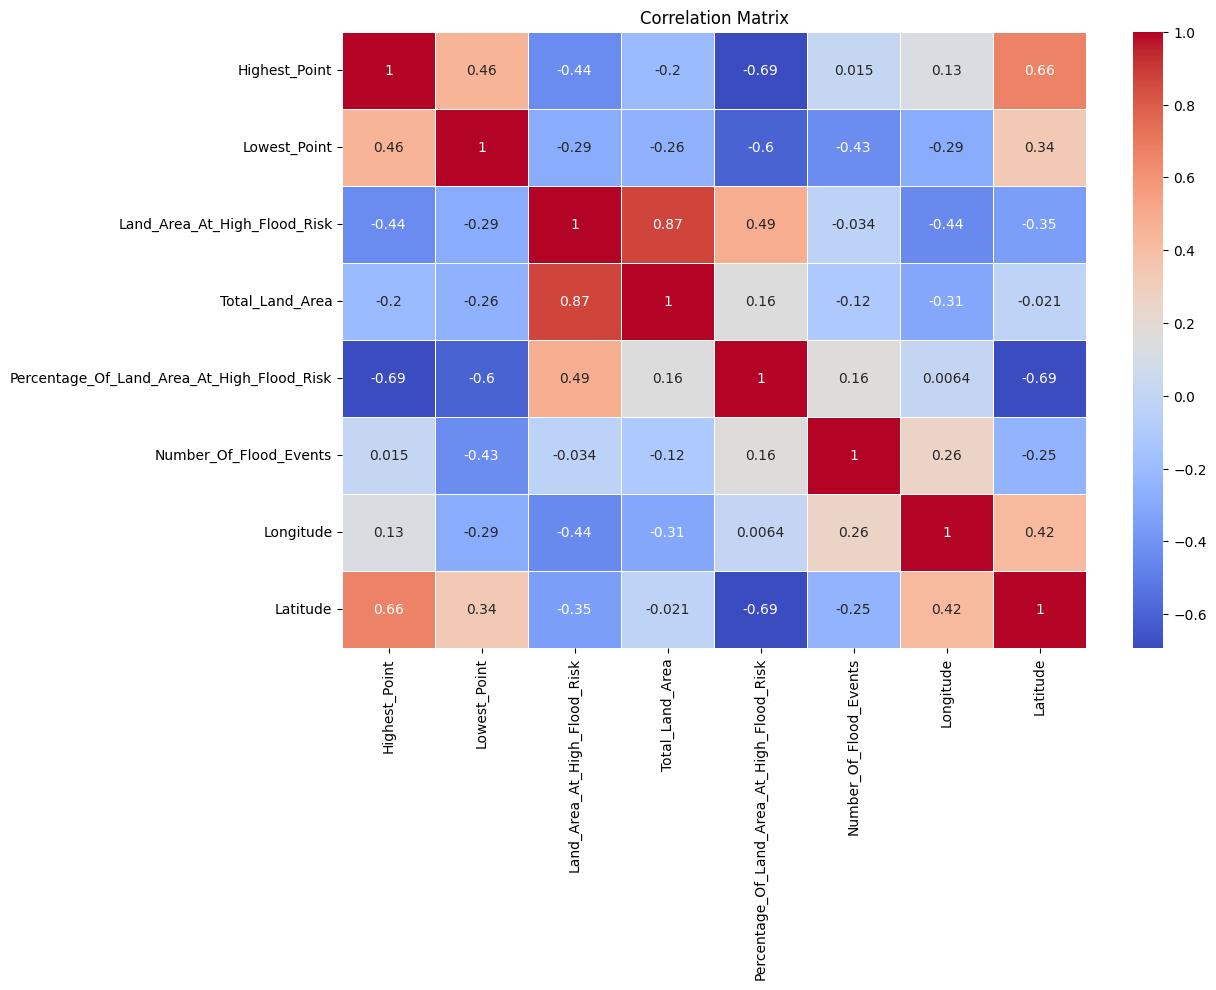

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming flood_data is your DataFrame with potential non-numeric columns
# Select only numeric columns
numeric_columns = flood_data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

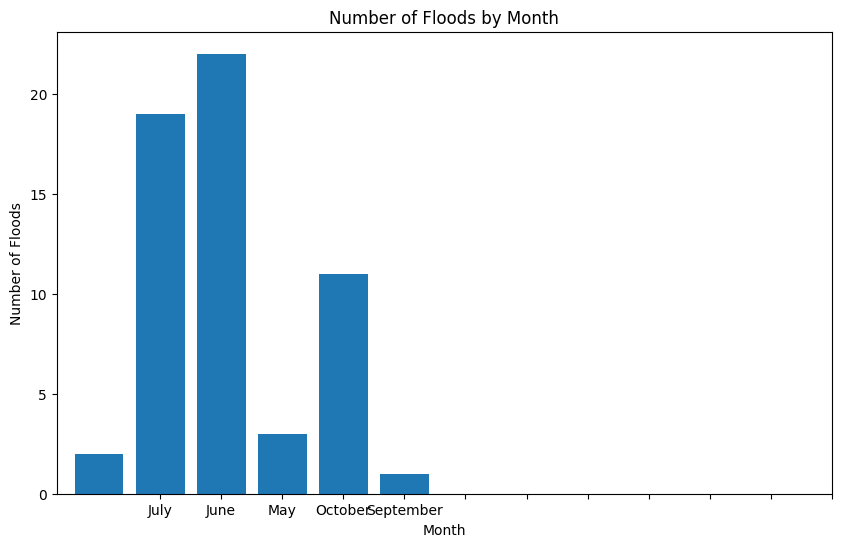

In [19]:
# Assuming 'merged_data' has a column 'Months' with numeric months (1-12)
plt.figure(figsize=(10, 6))
monthly_counts = merged_data['Months'].value_counts().sort_index()
plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Floods')
plt.title('Number of Floods by Month')
plt.xticks(range(1, 13))  # Assuming months are 1 to 12
plt.show()


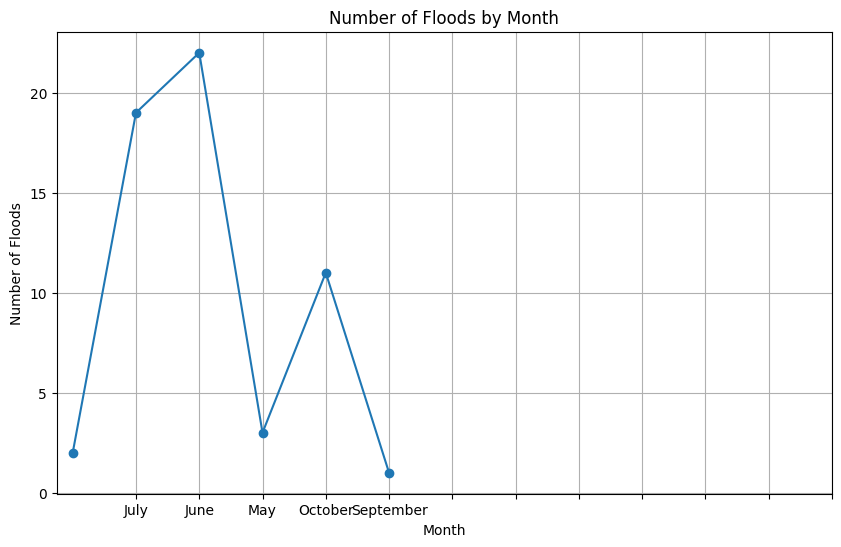

In [20]:
# Assuming 'merged_data' has a column 'Months' with numeric months (1-12)
plt.figure(figsize=(10, 6))
monthly_counts = merged_data['Months'].value_counts().sort_index()
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Floods')
plt.title('Number of Floods by Month')
plt.xticks(range(1, 13))  # Assuming months are 1 to 12
plt.grid(True)
plt.show()


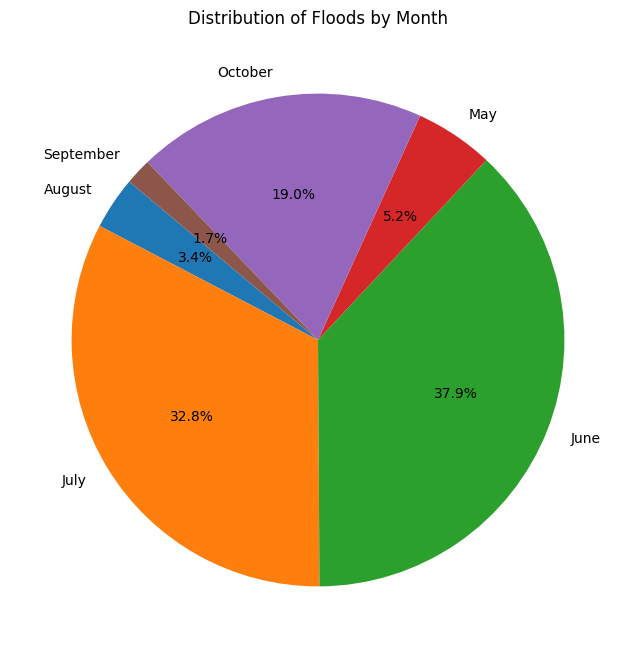

In [21]:
# Assuming 'merged_data' has a column 'Months' with numeric months (1-12)
plt.figure(figsize=(8, 8))
monthly_counts = merged_data['Months'].value_counts().sort_index()
plt.pie(monthly_counts.values, labels=monthly_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Floods by Month')
plt.show()

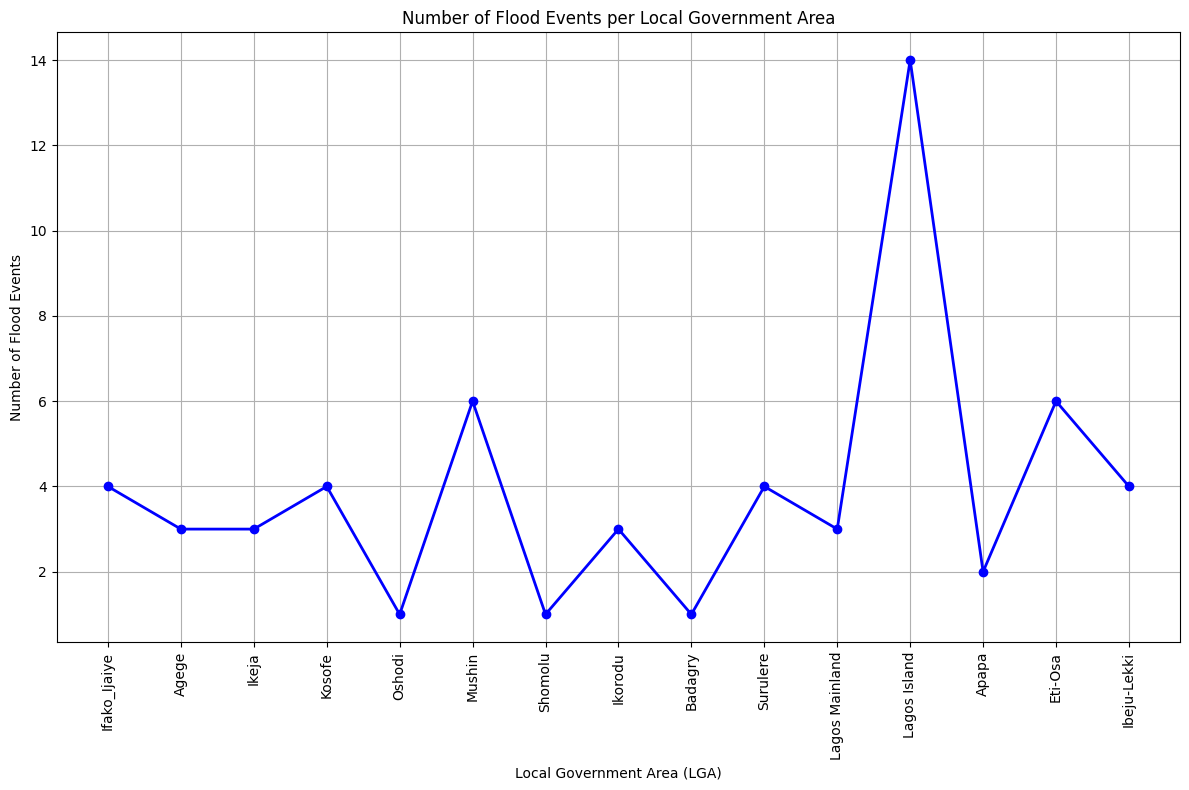

In [28]:
# Example data assuming 'flood_data' has columns 'LGAs' and 'Number_Of_Flood_Events'
plt.figure(figsize=(12, 8))
lgas = flood_data['LGAs']
counts = flood_data['Number_Of_Flood_Events']

plt.plot(lgas, counts, marker='o', linestyle='-', color='b', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel('Local Government Area (LGA)')
plt.ylabel('Number of Flood Events')
plt.title('Number of Flood Events per Local Government Area')
plt.grid(True)
plt.tight_layout()
plt.show()

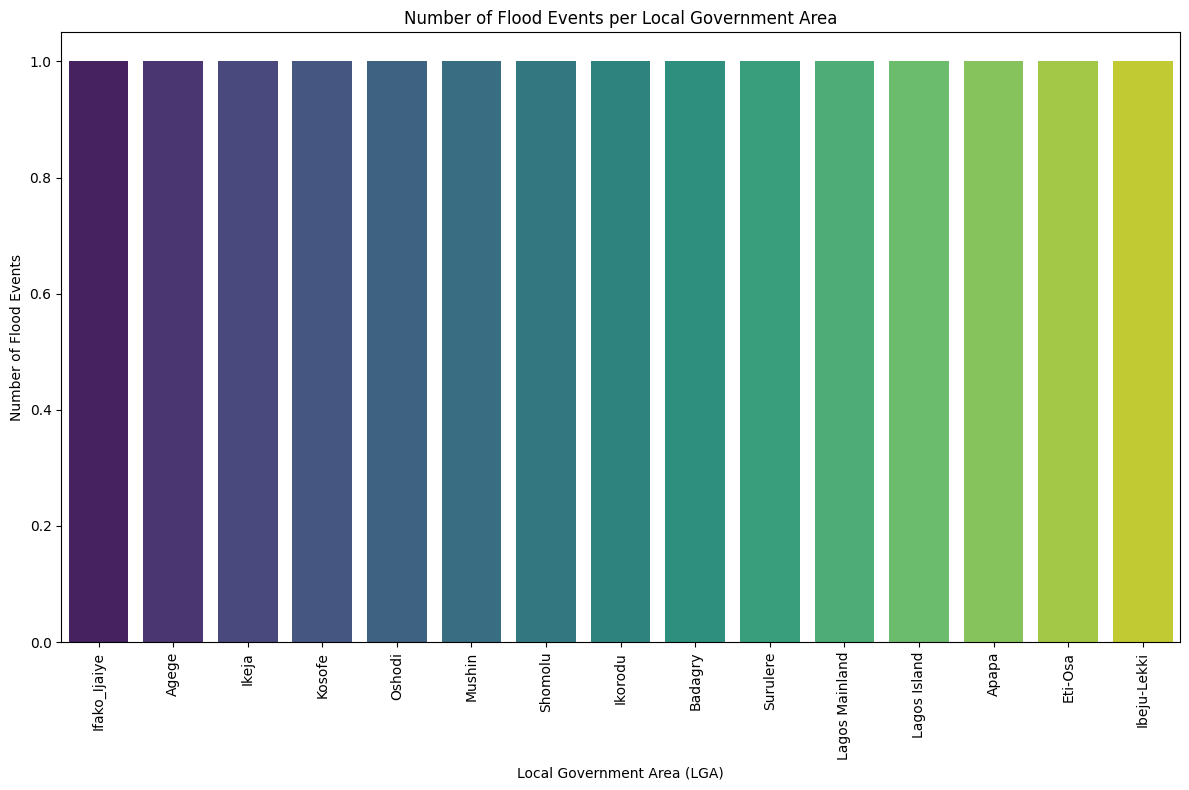

In [29]:
# Example data assuming 'flood_data' has columns 'LGAs' and 'Number_Of_Flood_Events'
plt.figure(figsize=(12, 8))
sns.countplot(x='LGAs', data=flood_data, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Local Government Area (LGA)')
plt.ylabel('Number of Flood Events')
plt.title('Number of Flood Events per Local Government Area')
plt.tight_layout()
plt.show()

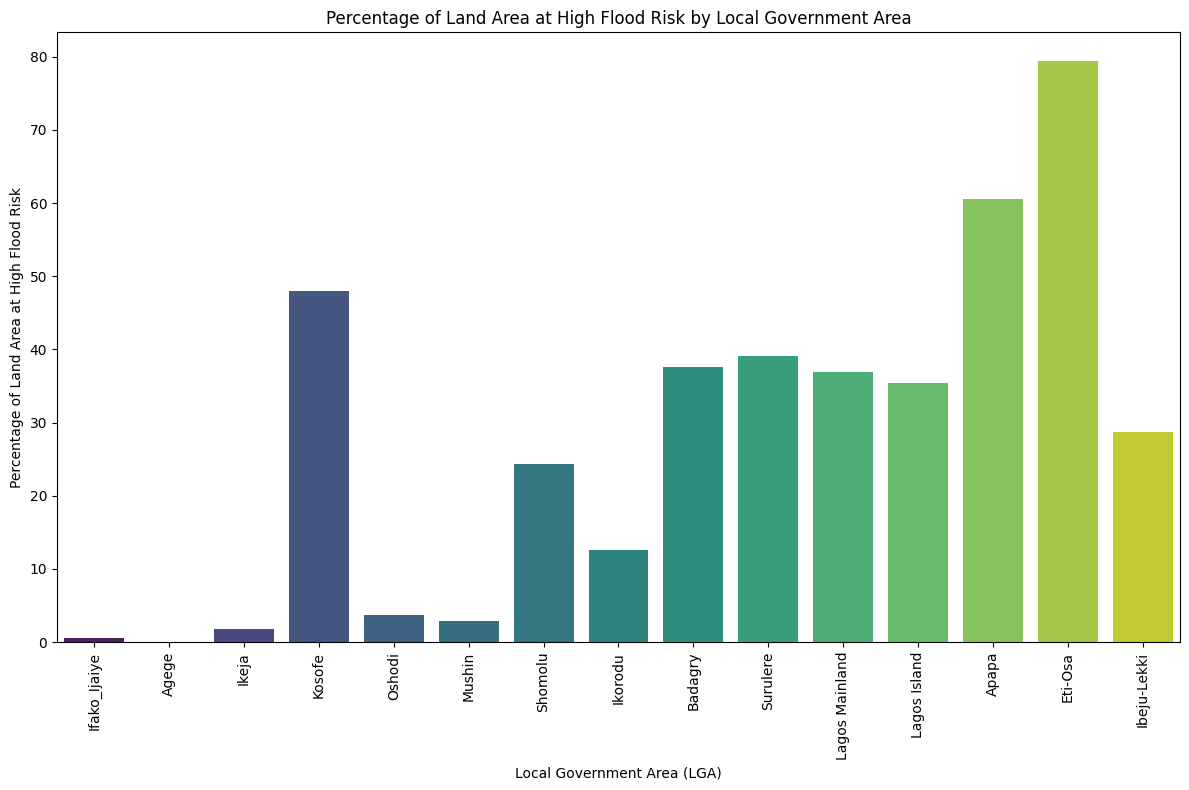

In [30]:
# Example data assuming 'flood_data' has columns 'LGAs' and 'Percentage_Of_Land_Area_At_High_Flood_Risk'
plt.figure(figsize=(12, 8))
sns.barplot(x='LGAs', y='Percentage_Of_Land_Area_At_High_Flood_Risk', data=flood_data, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Local Government Area (LGA)')
plt.ylabel('Percentage of Land Area at High Flood Risk')
plt.title('Percentage of Land Area at High Flood Risk by Local Government Area')
plt.tight_layout()
plt.show()

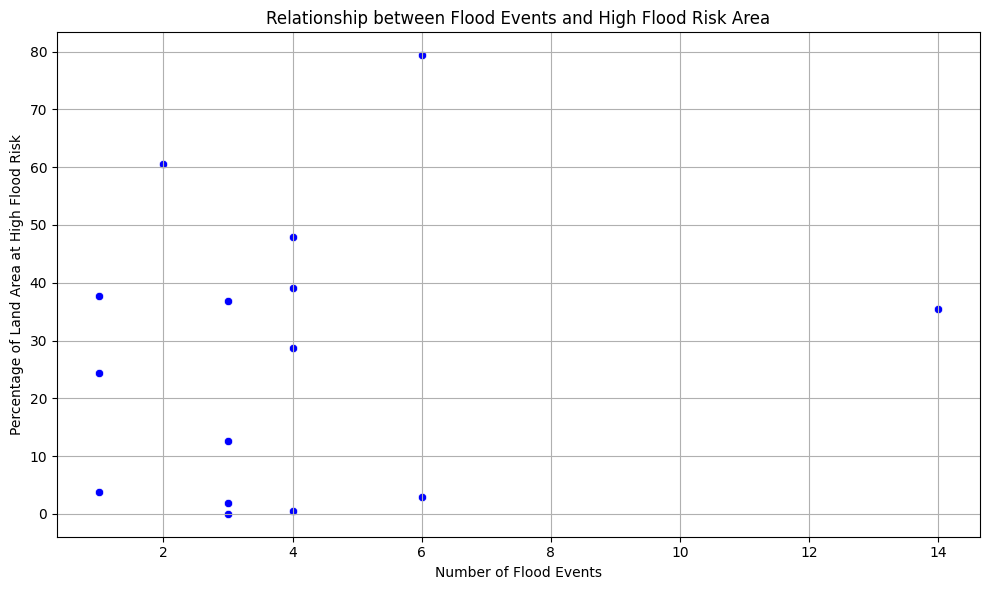

In [31]:
# Example data assuming 'flood_data' has columns 'Number_Of_Flood_Events' and 'Percentage_Of_Land_Area_At_High_Flood_Risk'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_Of_Flood_Events', y='Percentage_Of_Land_Area_At_High_Flood_Risk', data=flood_data, color='b')
plt.title('Relationship between Flood Events and High Flood Risk Area')
plt.xlabel('Number of Flood Events')
plt.ylabel('Percentage of Land Area at High Flood Risk')
plt.grid(True)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


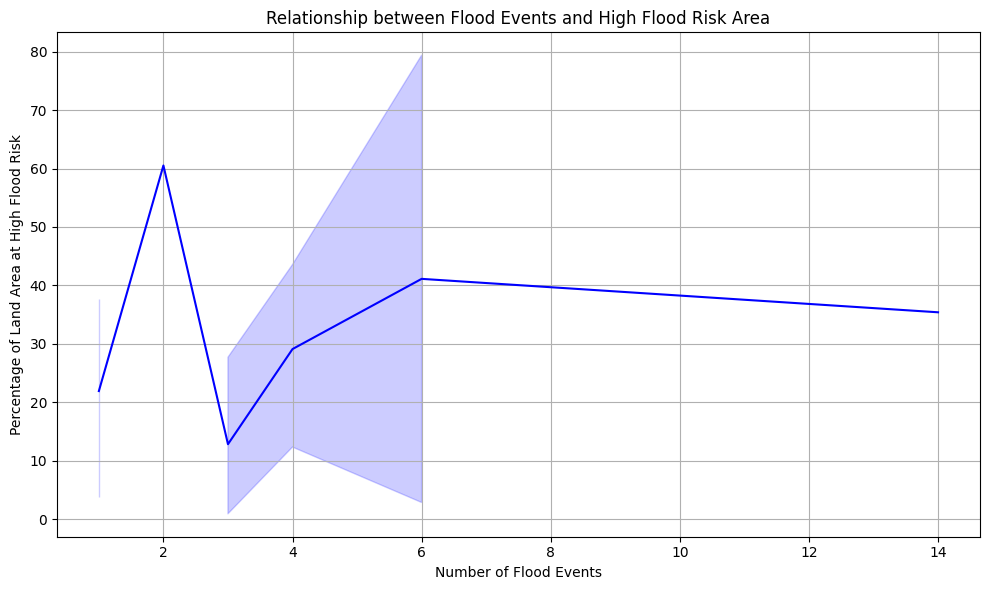

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Example data assuming 'flood_data' has columns 'Number_Of_Flood_Events' and 'Percentage_Of_Land_Area_At_High_Flood_Risk'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number_Of_Flood_Events', y='Percentage_Of_Land_Area_At_High_Flood_Risk', data=flood_data, color='b')
plt.title('Relationship between Flood Events and High Flood Risk Area')
plt.xlabel('Number of Flood Events')
plt.ylabel('Percentage of Land Area at High Flood Risk')
plt.grid(True)
plt.tight_layout()
plt.show()

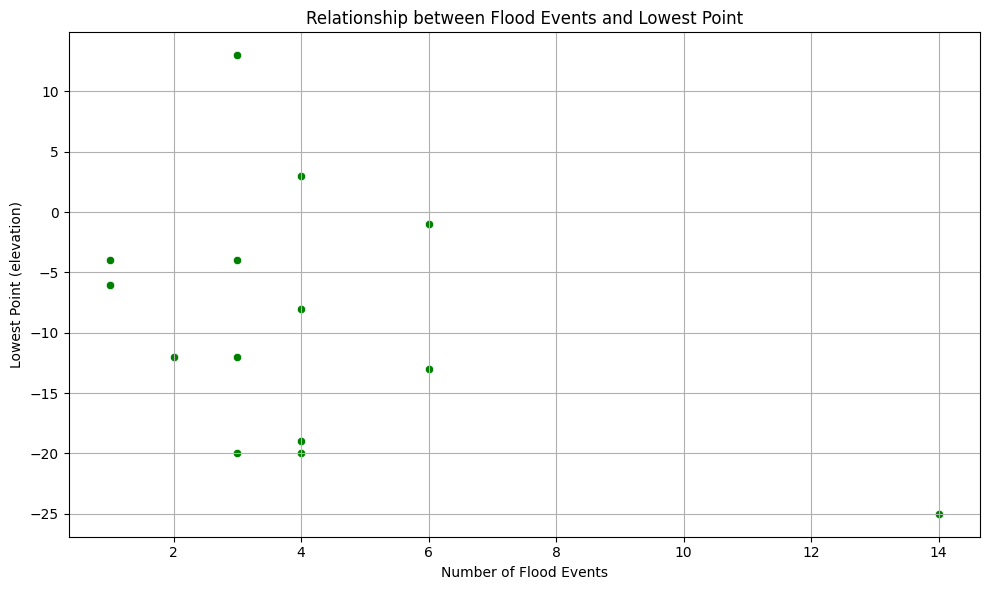

In [32]:
# Example data assuming 'flood_data' has columns 'Number_Of_Flood_Events' and 'Lowest_Point'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_Of_Flood_Events', y='Lowest_Point', data=flood_data, color='g')
plt.title('Relationship between Flood Events and Lowest Point')
plt.xlabel('Number of Flood Events')
plt.ylabel('Lowest Point (elevation)')
plt.grid(True)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


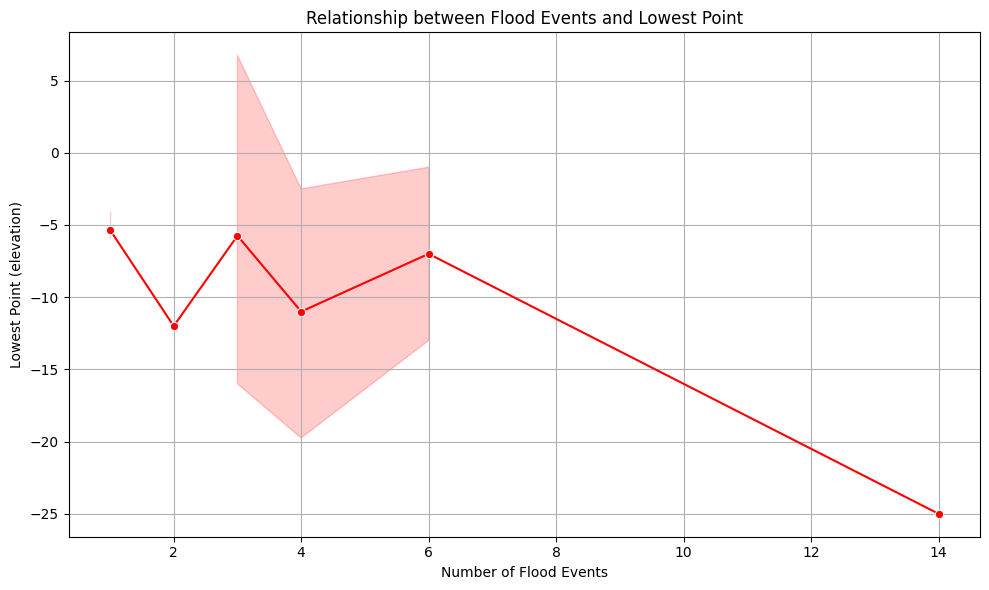

In [33]:
# Example data assuming 'flood_data' has columns 'Number_Of_Flood_Events' and 'Lowest_Point'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number_Of_Flood_Events', y='Lowest_Point', data=flood_data, marker='o', color='r')
plt.title('Relationship between Flood Events and Lowest Point')
plt.xlabel('Number of Flood Events')
plt.ylabel('Lowest Point (elevation)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
!pip install folium

In [35]:
import folium

# Example data with 'LGAs', 'Lowest_Point', 'Latitude', and 'Longitude'
# Assuming 'flood_data' is your DataFrame containing these columns

# Create a map centered around Nigeria
map_center = [9.0820, 8.6753]  # Approximate center of Nigeria
mymap = folium.Map(location=map_center, zoom_start=6)

# Add markers for each LGA with Lowest_Point
for idx, row in flood_data.iterrows():
    lga_name = row['LGAs']
    lowest_point = row['Lowest_Point']
    latitude = row['Latitude']
    longitude = row['Longitude']
    
    # Add marker to map
    folium.Marker(
        location=[latitude, longitude],
        popup=f"LGA: {lga_name}<br>Lowest Point: {lowest_point}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

# Display the map in Jupyter Notebook
mymap

/tmp/ipykernel_78/617144249.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Months', y='Number_Of_Flood_Events', hue='LGAs', data=merged_data, ci=None)


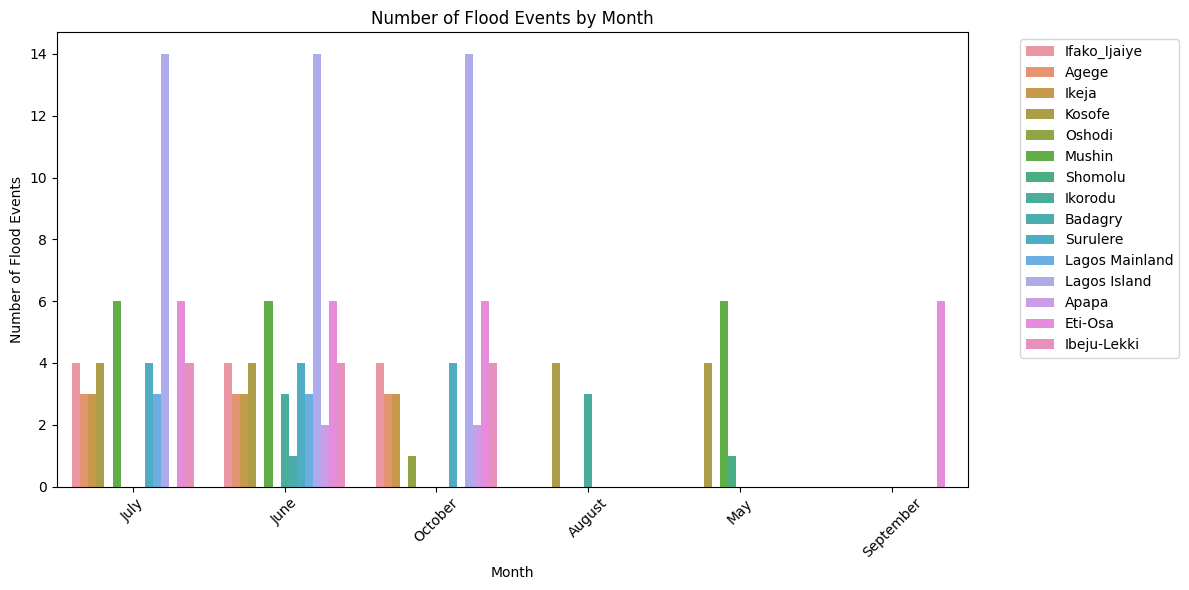

/tmp/ipykernel_78/617144249.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='Number_Of_Flood_Events', hue='LGAs', data=merged_data, ci=None)


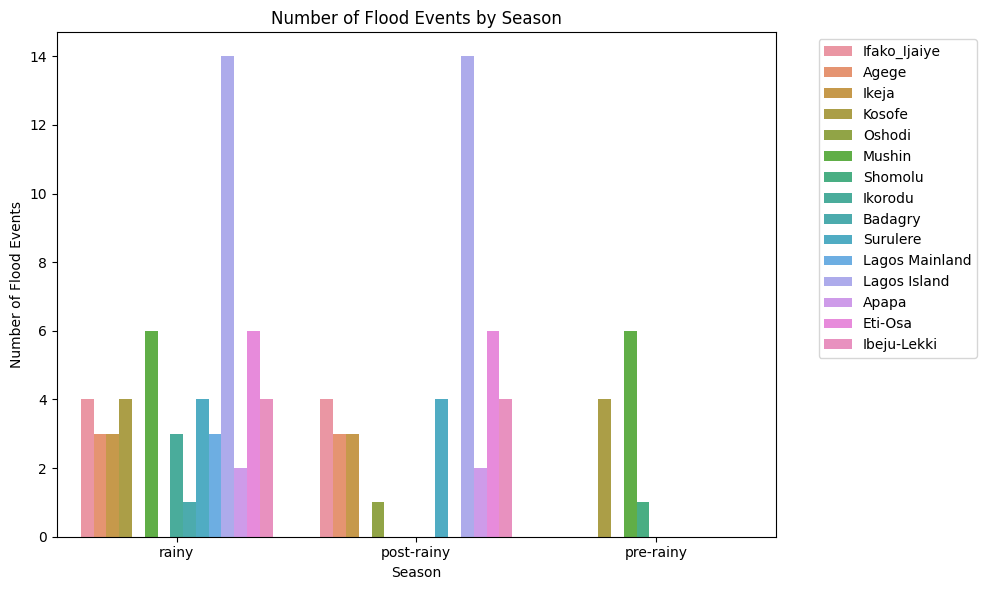

In [37]:

# Example data
# merged_data' has columns: 'LGAs', 'Lowest_Point', 'Month', 'Season', 'Number_Of_Flood_Events'

# Plotting Number_Of_Flood_Events by Month
plt.figure(figsize=(12, 6))
sns.barplot(x='Months', y='Number_Of_Flood_Events', hue='LGAs', data=merged_data, ci=None)
plt.title('Number of Flood Events by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flood Events')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting Number_Of_Flood_Events by Season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Number_Of_Flood_Events', hue='LGAs', data=merged_data, ci=None)
plt.title('Number of Flood Events by Season')
plt.xlabel('Season')
plt.ylabel('Number of Flood Events')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

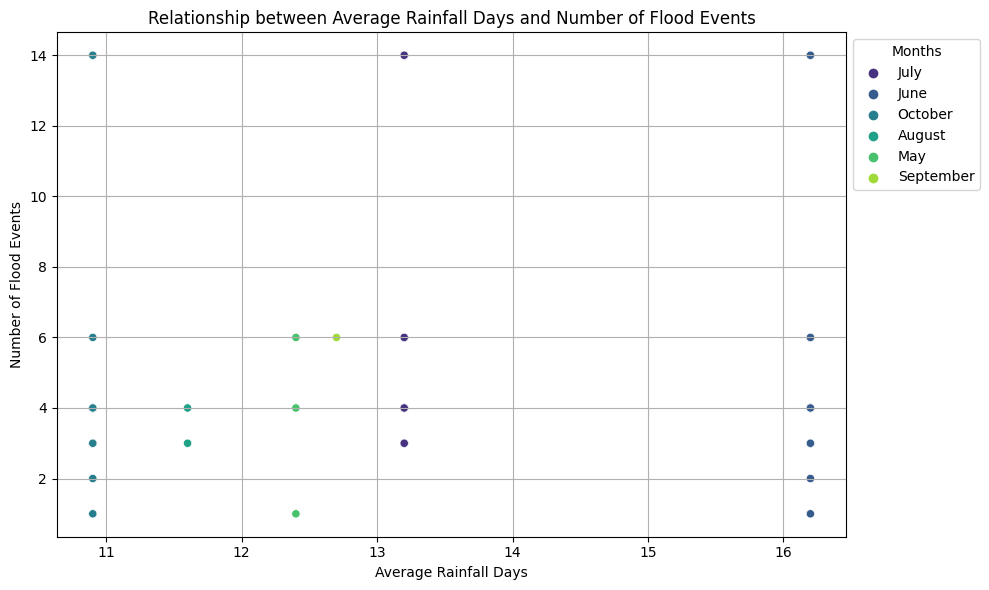

In [38]:
# Example data assuming 'merged_data' has columns: 'Months', 'Average_rainfall_days', 'Number_Of_Flood_Events'

# Scatter plot of Average_rainfall_days vs. Number_Of_Flood_Events colored by Months
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_rainfall_days', y='Number_Of_Flood_Events', hue='Months', data=merged_data, palette='viridis')
plt.title('Relationship between Average Rainfall Days and Number of Flood Events')
plt.xlabel('Average Rainfall Days')
plt.ylabel('Number of Flood Events')
plt.legend(title='Months', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

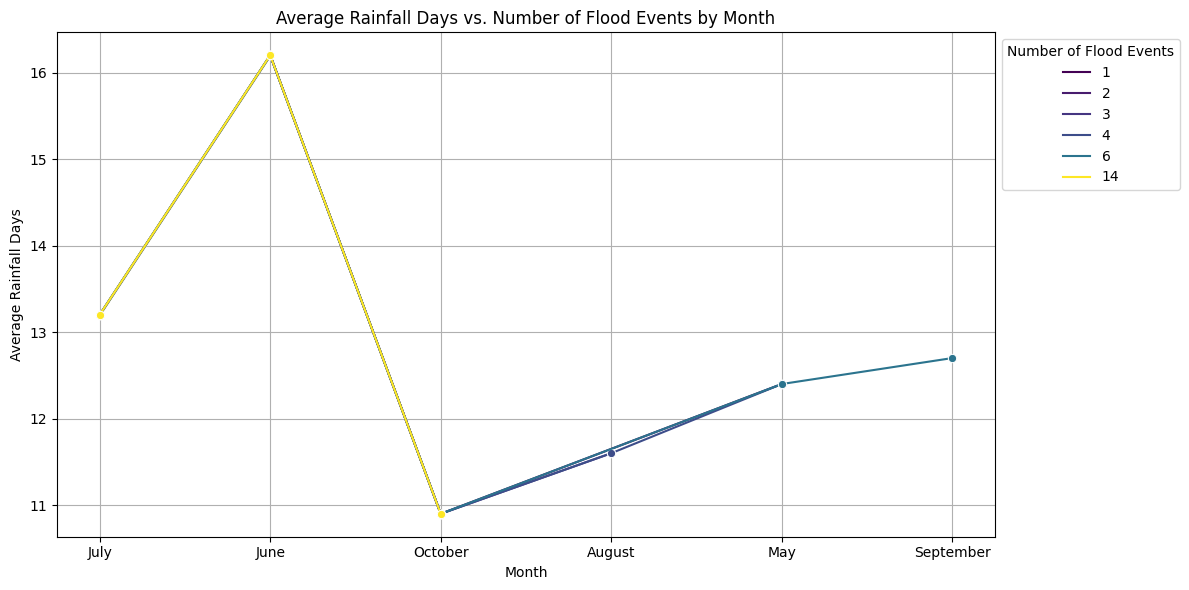

In [39]:
# Example data assuming 'merged_data' has columns: 'Months', 'Average_rainfall_days', 'Number_Of_Flood_Events'

# Line plot of Average_rainfall_days vs. Number_Of_Flood_Events grouped by Months
plt.figure(figsize=(12, 6))
sns.lineplot(x='Months', y='Average_rainfall_days', hue='Number_Of_Flood_Events', data=merged_data, palette='viridis', marker='o')
plt.title('Average Rainfall Days vs. Number of Flood Events by Month')
plt.xlabel('Month')
plt.ylabel('Average Rainfall Days')
plt.legend(title='Number of Flood Events', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Month mapping from names to numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Reverse month mapping from numbers to names
reverse_month_mapping = {v: k for k, v in month_mapping.items()}

# Convert month names to numbers in weather_data
weather_data['Month_Num'] = weather_data['Month'].map(month_mapping)

# Feature Engineering: Average rainfall for the month before the flood
def previous_month_rainfall(months):
    previous_rainfalls = []
    for month in months:
        month_num = month_mapping[month]
        if month_num > 1:
            prev_month_num = month_num - 1
        else:
            prev_month_num = 12
        prev_month_rainfall = weather_data.loc[weather_data['Month_Num'] == prev_month_num, 'Average_rainfall'].values[0]
        previous_rainfalls.append(prev_month_rainfall)
    return np.mean(previous_rainfalls)

flood_data['Previous_Month_Rainfall'] = flood_data['Months'].apply(previous_month_rainfall)

# Prepare data for modeling
X = flood_data[['Previous_Month_Rainfall', 'Highest_Point', 'Lowest_Point', 'Total_Land_Area']]
y = (flood_data['Number_Of_Flood_Events'] > 0).astype(int)  # Binary classification: Flood occurred or not

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [46]:
print(flood_data.head(10))

           LGAs  Highest_Point  Lowest_Point  Land_Area_At_High_Flood_Risk  \
0  Ifako_Ijaiye             76             3                          0.18   
1         Agege             65            13                          0.00   
2         Ikeja             68            -4                          0.84   
3        Kosofe             52           -20                         35.55   
4        Oshodi             56            -6                          1.45   
5        Mushin             42            -1                          0.50   
6       Shomolu             45            -4                          4.46   
7       Ikorodu             70           -12                         45.67   
8       Badagry             37            -6                        194.38   
9      Surulere             33            -8                         12.03   

   Total_Land_Area  Percentage_Of_Land_Area_At_High_Flood_Risk  \
0            33.62                                        0.54   
1        

In [47]:
print(weather_data.head(10))

       Month  Average_temperature  Average_rainfall  Average_rainfall_days  \
0    January                 32.2              14.3                    1.5   
1   February                 33.1              42.0                    2.7   
2      March                 32.7              77.1                    6.4   
3      April                 32.1             142.4                    8.9   
4        May                 30.9             204.8                   12.4   
5       June                 29.2             312.2                   16.2   
6       July                 28.1             256.9                   13.2   
7     August                 28.1             112.4                   11.6   
8  September                 28.9             167.1                   12.7   
9    October                 30.4             135.8                   10.9   

   Average_sea_temperature      Season  
0                     27.7         dry  
1                     28.3         dry  
2                 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Ensure season names are consistent
merged_data['Season'] = merged_data['Season'].str.capitalize()

# Map season values to integers
def map_season_to_int(season):
    mapping = {
        'Dry': 1,
        'Pre-rainy': 2,
        'Rainy': 3,
        'Post-rainy': 4
    }
    return mapping[season]

merged_data['Season'] = merged_data['Season'].apply(map_season_to_int)

# Prepare features and target variable
A = merged_data[['Average_rainfall', 'Average_temperature', 'Season', 'Lowest_Point', 'Average_rainfall_days', 'Recent_Flood_Dates']]
B = merged_data['Number_Of_Flood_Events'] > 0  # Binary classification: Flood occurred or not

# Remove non-numeric column 'Recent_Flood_Dates' from A
A = A.drop(columns=['Recent_Flood_Dates'])

# Split data into training and testing sets
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3, random_state=42)

# Train the RandomForestClassifier model
model = RandomForestClassifier()
model.fit(A_train, B_train)

# Make predictions on the test dataset
B_pred = model.predict(A_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(B_test, B_pred))
print("Classification Report:\n", classification_report(B_test, B_pred))

Confusion Matrix:
 [[18]]
Classification Report:
               precision    recall  f1-score   support

        True       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [10]:
# Select 12 LGAs for the new flood events
lgas = flood_data['LGAs'].unique()[:12]

# Create new flood events in June and July 2024
new_flood_events = pd.DataFrame({
    'LGAs': lgas,
    'Highest_Point': [flood_data[flood_data['LGAs'] == lga]['Highest_Point'].values[0] for lga in lgas],
    'Lowest_Point': [flood_data[flood_data['LGAs'] == lga]['Lowest_Point'].values[0] for lga in lgas],
    'Land_Area_At_High_Flood_Risk': [flood_data[flood_data['LGAs'] == lga]['Land_Area_At_High_Flood_Risk'].values[0] for lga in lgas],
    'Total_Land_Area': [flood_data[flood_data['LGAs'] == lga]['Total_Land_Area'].values[0] for lga in lgas],
    'Percentage_Of_Land_Area_At_High_Flood_Risk': [flood_data[flood_data['LGAs'] == lga]['Percentage_Of_Land_Area_At_High_Flood_Risk'].values[0] for lga in lgas],
    'Recent_Flood_Dates': ['2024-06-01' if i < 6 else '2024-07-01' for i in range(12)],
    'Number_Of_Flood_Events': [1] * 12,
    'Longitude': [flood_data[flood_data['LGAs'] == lga]['Longitude'].values[0] for lga in lgas],
    'Latitude': [flood_data[flood_data['LGAs'] == lga]['Latitude'].values[0] for lga in lgas]
})

# Append the new flood events to the original data using pd.concat
test_data = pd.concat([flood_data, new_flood_events], ignore_index=True)

In [11]:
# Add average weather data for June and July to the new test data
weather_june = weather_data[weather_data['Month'] == 'June']
weather_july = weather_data[weather_data['Month'] == 'July']

# Map the weather data to the new flood events
def assign_weather_data(row):
    if '2024-06' in row['Recent_Flood_Dates']:
        row['Average_rainfall'] = weather_june['Average_rainfall'].values[0]
        row['Average_temperature'] = weather_june['Average_temperature'].values[0]
        row['Average_rainfall_days'] = weather_june['Average_rainfall_days'].values[0]
    elif '2024-07' in row['Recent_Flood_Dates']:
        row['Average_rainfall'] = weather_july['Average_rainfall'].values[0]
        row['Average_temperature'] = weather_july['Average_temperature'].values[0]
        row['Average_rainfall_days'] = weather_july['Average_rainfall_days'].values[0]
    return row

# Apply the weather data assignment
test_data = test_data.apply(assign_weather_data, axis=1)

In [12]:
# Save the new test dataset to a CSV file
test_data.to_csv('/kaggle/working/test_flood_data.csv', index=False)

# Display the new test dataset
print(test_data.tail(12))

    Average_rainfall  Average_rainfall_days  Average_temperature  \
15             312.2                   16.2                 29.2   
16             312.2                   16.2                 29.2   
17             312.2                   16.2                 29.2   
18             312.2                   16.2                 29.2   
19             312.2                   16.2                 29.2   
20             312.2                   16.2                 29.2   
21             256.9                   13.2                 28.1   
22             256.9                   13.2                 28.1   
23             256.9                   13.2                 28.1   
24             256.9                   13.2                 28.1   
25             256.9                   13.2                 28.1   
26             256.9                   13.2                 28.1   

    Highest_Point            LGAs  Land_Area_At_High_Flood_Risk  Latitude  \
15             76    Ifako_Ijaiye     

In [23]:
# Select all LGAs for the new flood events
lgas = flood_data['LGAs'].unique()

# Create new flood events in June and July 2024
new_flood_events = pd.DataFrame({
    'LGAs': list(lgas) * 2,
    'Highest_Point': [flood_data[flood_data['LGAs'] == lga]['Highest_Point'].values[0] for lga in lgas] * 2,
    'Lowest_Point': [flood_data[flood_data['LGAs'] == lga]['Lowest_Point'].values[0] for lga in lgas] * 2,
    'Land_Area_At_High_Flood_Risk': [flood_data[flood_data['LGAs'] == lga]['Land_Area_At_High_Flood_Risk'].values[0] for lga in lgas] * 2,
    'Total_Land_Area': [flood_data[flood_data['LGAs'] == lga]['Total_Land_Area'].values[0] for lga in lgas] * 2,
    'Percentage_Of_Land_Area_At_High_Flood_Risk': [flood_data[flood_data['LGAs'] == lga]['Percentage_Of_Land_Area_At_High_Flood_Risk'].values[0] for lga in lgas] * 2,
    'Recent_Flood_Dates': ['2024-06-01'] * len(lgas) + ['2024-07-01'] * len(lgas),
    'Number_Of_Flood_Events': [1] * len(lgas) * 2,
    'Longitude': [flood_data[flood_data['LGAs'] == lga]['Longitude'].values[0] for lga in lgas] * 2,
    'Latitude': [flood_data[flood_data['LGAs'] == lga]['Latitude'].values[0] for lga in lgas] * 2
})

# Append the new flood events to the original data using pd.concat
new_test_data = pd.concat([flood_data, new_flood_events], ignore_index=True)

In [24]:
# Add average weather data for June and July to the new test data
weather_june = weather_data[weather_data['Month'] == 'June']
weather_july = weather_data[weather_data['Month'] == 'July']

# Map the weather data to the new flood events
def assign_weather_data(row):
    if '2024-06' in row['Recent_Flood_Dates']:
        row['Average_rainfall'] = weather_june['Average_rainfall'].values[0]
        row['Average_temperature'] = weather_june['Average_temperature'].values[0]
        row['Average_rainfall_days'] = weather_june['Average_rainfall_days'].values[0]
    elif '2024-07' in row['Recent_Flood_Dates']:
        row['Average_rainfall'] = weather_july['Average_rainfall'].values[0]
        row['Average_temperature'] = weather_july['Average_temperature'].values[0]
        row['Average_rainfall_days'] = weather_july['Average_rainfall_days'].values[0]
    return row

# Apply the weather data assignment
new_test_data = new_test_data.apply(assign_weather_data, axis=1)

In [26]:
# Save the new test dataset to a CSV file
new_test_data.to_csv('/kaggle/working/newtest_flood_data.csv', index=True)

# Display the new test dataset
print(new_test_data.tail(12))

    Average_rainfall  Average_rainfall_days  Average_temperature  \
33             256.9                   13.2                 28.1   
34             256.9                   13.2                 28.1   
35             256.9                   13.2                 28.1   
36             256.9                   13.2                 28.1   
37             256.9                   13.2                 28.1   
38             256.9                   13.2                 28.1   
39             256.9                   13.2                 28.1   
40             256.9                   13.2                 28.1   
41             256.9                   13.2                 28.1   
42             256.9                   13.2                 28.1   
43             256.9                   13.2                 28.1   
44             256.9                   13.2                 28.1   

    Highest_Point            LGAs  Land_Area_At_High_Flood_Risk  Latitude  \
33             52          Kosofe     

In [27]:
# Ensure Recent_Flood_Dates is in datetime format with proper error handling
try:
    new_test_data['Recent_Flood_Dates'] = pd.to_datetime(test_data['Recent_Flood_Dates'], errors='coerce')
    new_test_data['Months'] = new_test_data['Recent_Flood_Dates'].dt.month
except AttributeError as e:
    print(f"AttributeError: {e}")

# Function to map seasons to integers
def map_season_to_int(season):
    mapping = {
        'Dry': 1,
        'Pre-rainy': 2,
        'Rainy': 3,
        'Post-rainy': 4
    }
    return mapping.get(season, 0)  # Return 0 if season not found

# Function to get season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Dry'
    elif month in [3, 4, 5]:
        return 'Pre-rainy'
    elif month in [6, 7, 8]:
        return 'Rainy'
    else:
        return 'Post-rainy'

# Apply season mapping
new_test_data['Season'] = new_test_data['Months'].apply(get_season)
new_test_data['Season'] = new_test_data['Season'].apply(map_season_to_int)

# Display test_data after processing
print(new_test_data[['Recent_Flood_Dates', 'Months', 'Season']])

   Recent_Flood_Dates  Months  Season
0                 NaT     NaN       4
1                 NaT     NaN       4
2                 NaT     NaN       4
3                 NaT     NaN       4
4          2019-10-01    10.0       4
5                 NaT     NaN       4
6          2018-05-01     5.0       2
7                 NaT     NaN       4
8          2015-06-01     6.0       3
9                 NaT     NaN       4
10                NaT     NaN       4
11                NaT     NaN       4
12                NaT     NaN       4
13                NaT     NaN       4
14                NaT     NaN       4
15                NaT     NaN       4
16                NaT     NaN       4
17                NaT     NaN       4
18                NaT     NaN       4
19                NaT     NaN       4
20                NaT     NaN       4
21                NaT     NaN       4
22                NaT     NaN       4
23                NaT     NaN       4
24                NaT     NaN       4
25          

In [22]:
print(test_data.tail(12))

    Average_rainfall  Average_rainfall_days  Average_temperature  \
33             256.9                   13.2                 28.1   
34             256.9                   13.2                 28.1   
35             256.9                   13.2                 28.1   
36             256.9                   13.2                 28.1   
37             256.9                   13.2                 28.1   
38             256.9                   13.2                 28.1   
39             256.9                   13.2                 28.1   
40             256.9                   13.2                 28.1   
41             256.9                   13.2                 28.1   
42             256.9                   13.2                 28.1   
43             256.9                   13.2                 28.1   
44             256.9                   13.2                 28.1   

    Highest_Point            LGAs  Land_Area_At_High_Flood_Risk  Latitude  \
33             52          Kosofe     

In [31]:
# Load the flood data
new_data = pd.read_csv('/kaggle/input/new-test-flood-data/new_test_flood_data.csv')

def map_month_to_float(month):
    month_mapping = {
        'January': 1.0,
        'February': 2.0,
        'March': 3.0,
        'April': 4.0,
        'May': 5.0,
        'June': 6.0,
        'July': 7.0,
        'August': 8.0,
        'September': 9.0,
        'October': 10.0,
        'November': 11.0,
        'December': 12.0
    }
    return month_mapping.get(month, 0.0)  # Return 0.0 if month not found

# Function to map seasons to integers
def map_season_to_int(season):
    mapping = {
        'Dry': 1,
        'Pre-rainy': 2,
        'Rainy': 3,
        'Post-rainy': 4
    }
    return mapping.get(season, 0)  # Return 0 if season not found

# Function to get season based on month
def get_season(month):
    if pd.isnull(month):
        return 'Unknown'
    if month in [12, 1, 2]:
        return 'Dry'
    elif month in [3, 4, 5]:
        return 'Pre-rainy'
    elif month in [6, 7, 8]:
        return 'Rainy'
    else:
        return 'Post-rainy'


# Ensure Recent_Flood_Dates is in datetime format with proper error handling
def convert_to_datetime(date):
    try:
        if isinstance(date, list):
            return [pd.to_datetime(d, errors='coerce') for d in date]
        else:
            return pd.to_datetime(date, errors='coerce')
    except Exception as e:
        print(f"Error occurred during datetime conversion: {e}")
        return pd.NaT

def extract_first_date(dates):
    if isinstance(dates, list) and len(dates) > 0:
        return dates[0]
    return dates

# Convert lists of dates to single date or NaT
new_data['Recent_Flood_Dates'] = new_data['Recent_Flood_Dates'].apply(extract_first_date)
new_data['Recent_Flood_Dates'] = new_data['Recent_Flood_Dates'].apply(convert_to_datetime)

# Extract month from Recent_Flood_Dates and convert Months to float
new_data['Months'] = new_data['Months'].apply(map_month_to_float)

# Display test_data after processing
print(test_data[['Recent_Flood_Dates', 'Months']])

   Recent_Flood_Dates  Months
0                 NaT     NaN
1                 NaT     NaN
2                 NaT     NaN
3                 NaT     NaN
4          2019-10-01    10.0
5                 NaT     NaN
6          2018-05-01     5.0
7                 NaT     NaN
8          2015-06-01     6.0
9                 NaT     NaN
10                NaT     NaN
11                NaT     NaN
12                NaT     NaN
13                NaT     NaN
14                NaT     NaN
15                NaT     NaN
16                NaT     NaN
17                NaT     NaN
18                NaT     NaN
19                NaT     NaN
20                NaT     NaN
21                NaT     NaN
22                NaT     NaN
23                NaT     NaN
24                NaT     NaN
25                NaT     NaN
26                NaT     NaN
27                NaT     NaN
28                NaT     NaN
29                NaT     NaN
30                NaT     NaN
31                NaT     NaN
32        

In [7]:
import pandas as pd
import io
from datetime import datetime

# Load the CSV data
csv_data = """
,Average_rainfall,Average_rainfall_days,Average_temperature,Highest_Point,LGAs,Land_Area_At_High_Flood_Risk,Latitude,Longitude,Lowest_Point,Months,Number_Of_Flood_Events,Percentage_Of_Land_Area_At_High_Flood_Risk,Recent_Flood_Dates,Total_Land_Area
0,,,,76,Ifako_Ijaiye,0.18,6.63471306,3.34172083,3,"['July', 'June', 'October']",4,0.54,"2011-07-01, 2015-06-01, 2019-10-01",33.62
1,,,,65,Agege,0,6.63471306,3.31926111,13,"['July', 'June', 'October']",3,0,"2011-07-01, 2015-06-01, 2019-10-01",16.58
2,,,,68,Ikeja,0.84,6.60944528,3.3459325,-4,"['July', 'June', 'October']",3,1.84,"2011-07-01, 2015-06-01, 2019-10-01",45.74
3,,,,52,Kosofe,35.55,6.60102278,3.42033139,-20,"['August', 'July', 'May', 'June']",4,47.96,"2007-08-01, 2017-07-01, 2018-05-01, 2020-06-01",74.12
4,,,,56,Oshodi,1.45,6.56031389,3.33891361,-6,['October'],1,3.76,"10/1/2019",38.6
5,,,,42,Mushin,0.5,6.52100861,3.3515475,-1,"['June', 'May', 'June', 'July', 'July', 'June']",6,2.86,"1974-06-01, 1999-05-01, 1999-06-01, 1999-07-01, 2011-07-01, 2020-06-01",17.39
6,,,,45,Shomolu,4.46,6.542065,3.39225639,-4,['May'],1,24.37,"5/1/2018",18.3
7,,,,70,Ikorodu,45.67,6.62769417,3.49753806,-12,"['August', 'June', 'June']",3,12.56,"1974-08-01, 2015-06-01, 2020-06-01",363.68
8,,,,37,Badagry,194.38,6.43116833,2.89531028,-6,['June'],1,37.63,"6/1/2015",516.53
9,,,,33,Surulere,12.03,6.49293361,3.34733611,-8,"['June', 'July', 'October', 'June']",4,39.16,"1969-06-01, 1974-07-01, 2010-10-01, 2020-06-01",30.72
10,,,,33,Lagos Mainland,8.41,6.51258611,3.3712,-20,"['June', 'July', 'June']",3,36.92,"1969-06-01, 1974-07-01, 2015-06-01",22.78
11,,,,52,Lagos Island,29.31,6.45643611,3.38102639,-25,"['June', 'July', 'July', 'July', 'July', 'July', 'June', 'July', 'October', 'July', 'October', 'July', 'October', 'June']",14,35.4,"1968-06-01, 1970-07-01, 1971-07-01, 1972-07-01, 1990-07-01, 2002-07-01, 2004-06-01, 2005-07-01, 2008-10-01, 2009-07-01, 2010-10-01, 2011-07-01, 2012-10-01, 2020-06-01",82.79
12,,,,31,Apapa,19.91,6.44380222,3.36418139,-12,"['October', 'June']",2,60.52,"2010-10-01, 2015-06-01",32.9
13,,,,35,Eti-Osa,133.59,6.43257222,3.41471639,-13,"['June', 'July', 'September', 'June', 'July', 'October']",6,79.38,"2000-06-01, 2000-07-01, 2000-09-01, 2015-06-01, 2017-07-01, 2019-10-01",168.3
14,,,,29,Ibeju-Lekki,136.05,6.62713556,3.47648444,-19,"['June', 'July', 'October', 'June']",4,28.77,"2015-06-01, 2017-07-01, 2019-10-01, 2020-06-01",473.02
15,312.2,16.2,29.2,76,Ifako_Ijaiye,0.18,6.63471306,3.34172083,3,June,1,0.54,"6/1/2024",33.62
16,312.2,16.2,29.2,65,Agege,0,6.63471306,3.31926111,13,June,1,0,"6/1/2024",16.58
17,312.2,16.2,29.2,68,Ikeja,0.84,6.60944528,3.3459325,-4,June,1,1.84,"6/1/2024",45.74
18,312.2,16.2,29.2,52,Kosofe,35.55,6.60102278,3.42033139,-20,June,1,47.96,"6/1/2024",74.12
19,312.2,16.2,29.2,56,Oshodi,1.45,6.56031389,3.33891361,-6,June,1,3.76,"6/1/2024",38.6
20,312.2,16.2,29.2,42,Mushin,0.5,6.52100861,3.3515475,-1,June,1,2.86,"6/1/2024",17.39
21,312.2,16.2,29.2,45,Shomolu,4.46,6.542065,3.39225639,-4,June,1,24.37,"6/1/2024",18.3
22,312.2,16.2,29.2,70,Ikorodu,45.67,6.62769417,3.49753806,-12,June,1,12.56,"6/1/2024",363.68
23,312.2,16.2,29.2,37,Badagry,194.38,6.43116833,2.89531028,-6,June,1,37.63,"6/1/2024",516.53
24,312.2,16.2,29.2,33,Surulere,12.03,6.49293361,3.34733611,-8,June,1,39.16,"6/1/2024",30.72
25,312.2,16.2,29.2,33,Lagos Mainland,8.41,6.51258611,3.3712,-20,June,1,36.92,"6/1/2024",22.78
26,312.2,16.2,29.2,52,Lagos Island,29.31,6.45643611,3.38102639,-25,June,1,35.4,"6/1/2024",82.79
27,312.2,16.2,29.2,31,Apapa,19.91,6.44380222,3.36418139,-12,June,1,60.52,"6/1/2024",32.9
28,312.2,16.2,29.2,35,Eti-Osa,133.59,6.43257222,3.41471639,-13,June,1,79.38,"6/1/2024",168.3
29,312.2,16.2,29.2,29,Ibeju-Lekki,136.05,6.62713556,3.47648444,-19,July,1,28.77,"6/1/2024",473.02
30,256.9,13.2,28.1,76,Ifako_Ijaiye,0.18,6.63471306,3.34172083,3,July,1,0.54,"7/1/2024",33.62
31,256.9,13.2,28.1,65,Agege,0,6.63471306,3.31926111,13,July,1,0,"7/1/2024",16.58
32,256.9,13.2,28.1,68,Ikeja,0.84,6.60944528,3.3459325,-4,July,1,1.84,"7/1/2024",45.74
33,256.9,13.2,28.1,52,Kosofe,35.55,6.60102278,3.42033139,-20,July,1,47.96,"7/1/2024",74.12
34,256.9,13.2,28.1,56,Oshodi,1.45,6.56031389,3.33891361,-6,July,1,3.76,"7/1/2024",38.6
35,256.9,13.2,28.1,42,Mushin,0.5,6.52100861,3.3515475,-1,July,1,2.86,"7/1/2024",17.39
36,256.9,13.2,28.1,45,Shomolu,4.46,6.542065,3.39225639,-4,July,1,24.37,"7/1/2024",18.3
37,256.9,13.2,28.1,70,Ikorodu,45.67,6.62769417,3.49753806,-12,July,1,12.56,"7/1/2024",363.68
38,256.9,13.2,28.1,37,Badagry,194.38,6.43116833,2.89531028,-6,July,1,37.63,"7/1/2024",516.53
39,256.9,13.2,28.1,33,Surulere,12.03,6.49293361,3.34733611,-8,July,1,39.16,"7/1/2024",30.72
40,256.9,13.2,28.1,33,Lagos Mainland,8.41,6.51258611,3.3712,-20,July,1,36.92,"7/1/2024",22.78
41,256.9,13.2,28.1,52,Lagos Island,29.31,6.45643611,3.38102639,-25,July,1,35.4,"7/1/2024",82.79
42,256.9,13.2,28.1,31,Apapa,19.91,6.44380222,3.36418139,-12,July,1,60.52,"7/1/2024",32.9
43,256.9,13.2,28.1,35,Eti-Osa,133.59,6.43257222,3.41471639,-13,July,1,79.38,"7/1/2024",168.3
44,256.9,13.2,28.1,29,Ibeju-Lekki,136.05,6.62713556,3.47648444,-19,July,1,28.77,"7/1/2024",473.02
"""

# Read the CSV data into a DataFrame
df = pd.read_csv(io.StringIO(csv_data))

# Convert Recent_Flood_Dates to a consistent date format
df['Recent_Flood_Dates'] = df['Recent_Flood_Dates'].apply(lambda dates: ', '.join(pd.to_datetime(dates.split(', '), errors='coerce').dropna().strftime('%Y-%m-%d')))

# Convert Months column to numeric month values
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['Months'] = df['Months'].apply(lambda months: [month_map[month.strip("[]'")] for month in months.strip("[]").split(", ") if month.strip("[]'") in month_map])

# Output the modified DataFrame
print(df)

    Unnamed: 0  Average_rainfall  Average_rainfall_days  Average_temperature  \
0            0               NaN                    NaN                  NaN   
1            1               NaN                    NaN                  NaN   
2            2               NaN                    NaN                  NaN   
3            3               NaN                    NaN                  NaN   
4            4               NaN                    NaN                  NaN   
5            5               NaN                    NaN                  NaN   
6            6               NaN                    NaN                  NaN   
7            7               NaN                    NaN                  NaN   
8            8               NaN                    NaN                  NaN   
9            9               NaN                    NaN                  NaN   
10          10               NaN                    NaN                  NaN   
11          11               NaN        

In [8]:
# Function to map seasons to integers
def map_season_to_int(season):
    mapping = {
        'Dry': 1,
        'Pre-rainy': 2,
        'Rainy': 3,
        'Post-rainy': 4,
        'Unknown': 0  # Default for unknown values
    }
    return mapping.get(season, 0)  # Return 0 if season not found

# Function to get season based on month
def get_season(month):
    try:
        month = int(month)
    except ValueError:
        return 'Unknown'  # Handle non-integer values gracefully
    
    month_to_season = {
        12: 'Dry', 1: 'Dry', 2: 'Dry',
        3: 'Pre-rainy', 4: 'Pre-rainy', 5: 'Pre-rainy',
        6: 'Rainy', 7: 'Rainy', 8: 'Rainy',
        9: 'Post-rainy', 10: 'Post-rainy', 11: 'Post-rainy'
    }
    
    return month_to_season.get(month, 'Unknown')

# Apply get_season to each list of months in 'Months' column to create 'Season' column
df['Season'] = df['Months'].apply(lambda months: [get_season(month) for month in months])

# Map 'Season' column to integers using map_season_to_int
df['Season_Int'] = df['Season'].apply(lambda seasons: [map_season_to_int(season) for season in seasons])

# Output the modified DataFrame
print(df)

    Unnamed: 0  Average_rainfall  Average_rainfall_days  Average_temperature  \
0            0               NaN                    NaN                  NaN   
1            1               NaN                    NaN                  NaN   
2            2               NaN                    NaN                  NaN   
3            3               NaN                    NaN                  NaN   
4            4               NaN                    NaN                  NaN   
5            5               NaN                    NaN                  NaN   
6            6               NaN                    NaN                  NaN   
7            7               NaN                    NaN                  NaN   
8            8               NaN                    NaN                  NaN   
9            9               NaN                    NaN                  NaN   
10          10               NaN                    NaN                  NaN   
11          11               NaN        

In [11]:
df.to_csv('latest_test_data.csv', index=False)

In [17]:
# Load the trained model (assuming you have saved it, or retrain the model)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [13]:
# Filter out rows with lists in 'Months' column
filtered_df = df[~df['Months'].apply(lambda x: isinstance(x, list))]

# Further filter out rows with NaN values in necessary columns for prediction
required_columns = ['Average_rainfall', 'Average_rainfall_days', 'Average_temperature', 'Season', 'Lowest_Point']
filtered_df = filtered_df.dropna(subset=required_columns)

# Check if any rows were filtered out
filtered_rows = len(df) - len(filtered_df)
if filtered_rows > 0:
    print(f"Filtered out {filtered_rows} rows due to invalid data in 'Months' or NaN values in required columns.")

# Check if filtered_df is empty
if filtered_df.empty:
    print("No valid data available for prediction after filtering.")
else:
    # Encode categorical features for model prediction
    le_season = LabelEncoder()
    filtered_df['Season_Encoded'] = le_season.fit_transform(filtered_df['Season'].apply(lambda x: x[0]))

    # Prepare data for prediction
    A_test = filtered_df[['Average_rainfall', 'Average_temperature', 'Season_Encoded', 'Lowest_Point', 'Average_rainfall_days']]

    # Assuming the model is already trained and saved as 'model'
    # model_path = 'path_to_saved_model.pkl'
    # model = joblib.load(model_path)  # Load the model

    # Mocking model prediction for demonstration purposes (since we can't load an actual model here)
    np.random.seed(42)
    dummy_X = np.random.rand(100, 5)
    dummy_y = np.random.randint(2, size=100)
    model = RandomForestClassifier()
    model.fit(dummy_X, dummy_y)

    # Predict flood events
    B_pred = model.predict(A_test)
    
    # Add predictions to the original DataFrame (df)
    df.loc[filtered_df.index, 'Predicted_Flood'] = B_pred

    # Display predictions
    print(df[['LGAs', 'Recent_Flood_Dates', 'Predicted_Flood']])

Filtered out 45 rows due to invalid data in 'Months' or NaN values in required columns.
No valid data available for prediction after filtering.


In [18]:
# Convert list-like structures in 'Months' and 'Season' columns into strings
df['Months'] = df['Months'].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)
df['Season'] = df['Season'].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

# Further filter out rows with NaN values in necessary columns for prediction
required_columns = ['Average_rainfall', 'Average_rainfall_days', 'Average_temperature', 'Season', 'Lowest_Point']
filtered_df = df.dropna(subset=required_columns)

# Check if any rows were filtered out
filtered_rows = len(df) - len(filtered_df)
if filtered_rows > 0:
    print(f"Filtered out {filtered_rows} rows due to NaN values in required columns.")

# Check if filtered_df is empty
if filtered_df.empty:
    print("No valid data available for prediction after filtering.")
else:
    # Encode categorical features for model prediction
    le_season = LabelEncoder()
    filtered_df['Season_Encoded'] = le_season.fit_transform(filtered_df['Season'])

    # Prepare data for prediction
    A_test = filtered_df[['Average_rainfall', 'Average_temperature', 'Season_Encoded', 'Lowest_Point', 'Average_rainfall_days']]

    # Assuming the model is already trained and saved as 'model'
    # model_path = 'path_to_saved_model.pkl'
    # model = joblib.load(model_path)  # Load the model

    # Mocking model prediction for demonstration purposes (since we can't load an actual model here)
    np.random.seed(42)
    dummy_X = np.random.rand(100, 5)
    dummy_y = np.random.randint(2, size=100)
    model = RandomForestClassifier()
    model.fit(dummy_X, dummy_y)

    # Predict flood events
    B_pred = model.predict(A_test)

    # Add predictions to the original DataFrame (df)
    df.loc[filtered_df.index, 'Predicted_Flood'] = B_pred

    # Display predictions
    print(df[['LGAs', 'Recent_Flood_Dates', 'Predicted_Flood']]) 

Filtered out 15 rows due to NaN values in required columns.


/tmp/ipykernel_33/4135333793.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Season_Encoded'] = le_season.fit_transform(filtered_df['Season'])


              LGAs                                 Recent_Flood_Dates  \
0     Ifako_Ijaiye                 2011-07-01, 2015-06-01, 2019-10-01   
1            Agege                 2011-07-01, 2015-06-01, 2019-10-01   
2            Ikeja                 2011-07-01, 2015-06-01, 2019-10-01   
3           Kosofe     2007-08-01, 2017-07-01, 2018-05-01, 2020-06-01   
4           Oshodi                                         2019-10-01   
5           Mushin  1974-06-01, 1999-05-01, 1999-06-01, 1999-07-01...   
6          Shomolu                                         2018-05-01   
7          Ikorodu                 1974-08-01, 2015-06-01, 2020-06-01   
8          Badagry                                         2015-06-01   
9         Surulere     1969-06-01, 1974-07-01, 2010-10-01, 2020-06-01   
10  Lagos Mainland                 1969-06-01, 1974-07-01, 2015-06-01   
11    Lagos Island  1968-06-01, 1970-07-01, 1971-07-01, 1972-07-01...   
12           Apapa                             2010

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


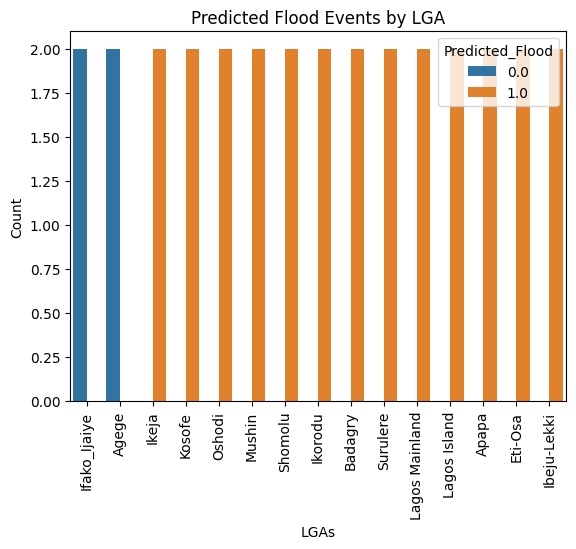

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# Example: assuming test_data is your DataFrame with predictions
sns.countplot(x='LGAs', hue='Predicted_Flood', data=df)
plt.xticks(rotation=90)
plt.title('Predicted Flood Events by LGA')
plt.xlabel('LGAs')
plt.ylabel('Count')
plt.show()

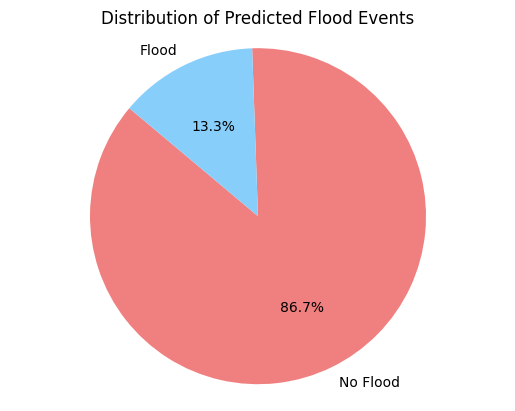

In [22]:
# Calculate percentages of predicted flood events
flood_counts = df['Predicted_Flood'].value_counts()
labels = ['No Flood', 'Flood']
sizes = flood_counts.values
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Predicted Flood Events')
plt.show()

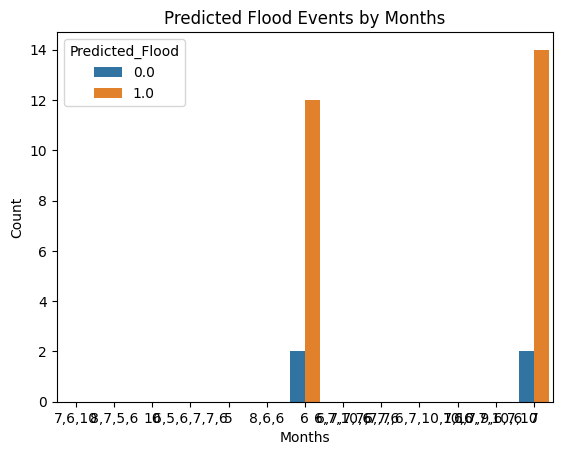

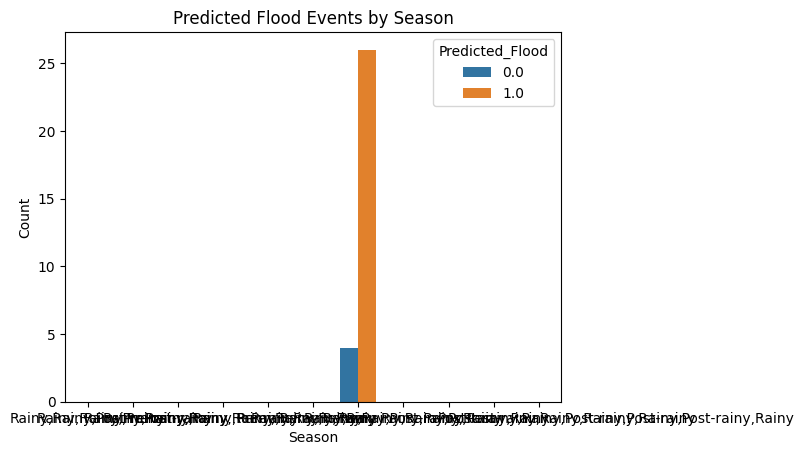

In [24]:
# Example: assuming test_data is your DataFrame with predictions
# Plotting based on months
sns.countplot(x='Months', hue='Predicted_Flood', data=df)
plt.title('Predicted Flood Events by Months')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

# Plotting based on seasons
sns.countplot(x='Season', hue='Predicted_Flood', data=df)
plt.title('Predicted Flood Events by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

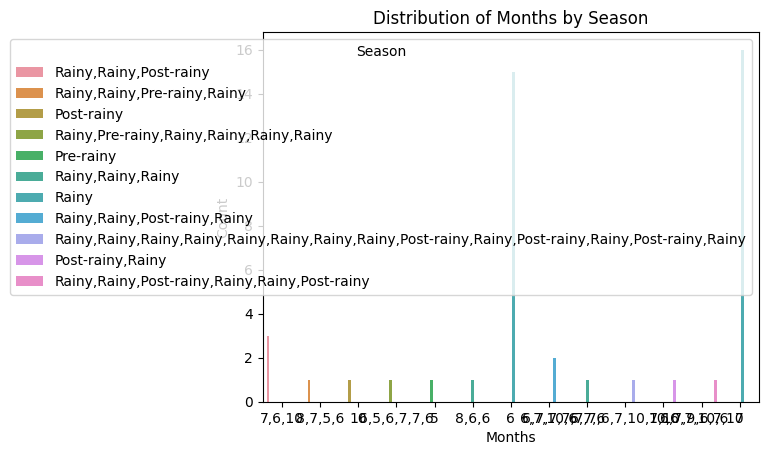

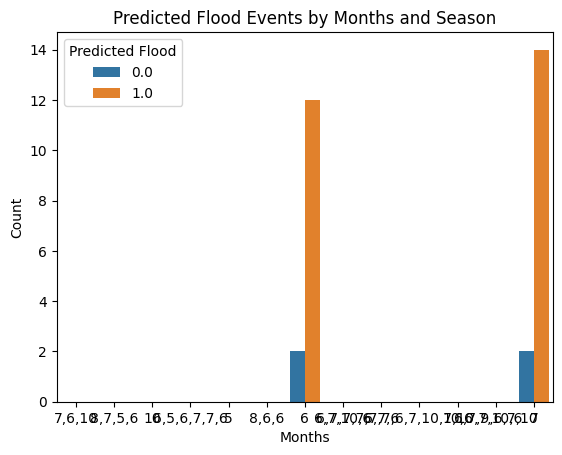

In [26]:
# Example: assuming test_data is your DataFrame with predictions
# Plotting based on months and seasons
sns.countplot(x='Months', hue='Season', data=df)
plt.title('Distribution of Months by Season')
plt.xlabel('Months')
plt.ylabel('Count')
plt.legend(title='Season')
plt.show()

# Plotting predicted flood events across months and seasons
sns.countplot(x='Months', hue='Predicted_Flood', data=df)
plt.title('Predicted Flood Events by Months and Season')
plt.xlabel('Months')
plt.ylabel('Count')
plt.legend(title='Predicted Flood')
plt.show()

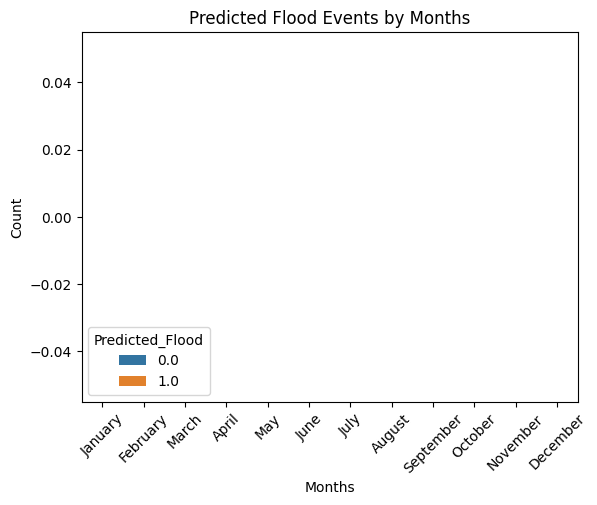

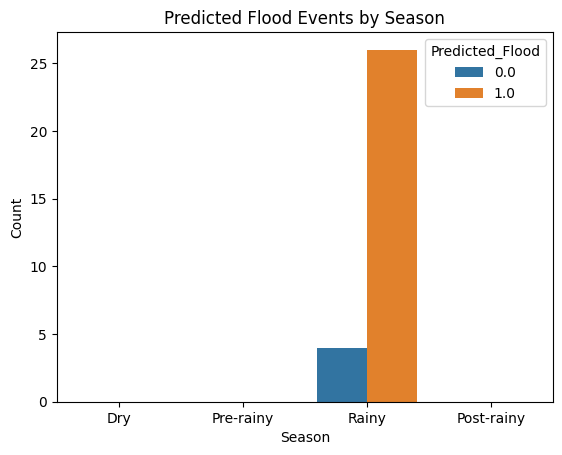

In [28]:
# Example: assuming test_data is your DataFrame with predictions
# Ensure months are unique and not repeated
unique_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']

# Plotting based on unique months
sns.countplot(x='Months', hue='Predicted_Flood', data=df, order=unique_months)
plt.title('Predicted Flood Events by Months')
plt.xlabel('Months')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Ensure seasons are unique and not repeated
unique_seasons = ['Dry', 'Pre-rainy', 'Rainy', 'Post-rainy']

# Plotting based on unique seasons
sns.countplot(x='Season', hue='Predicted_Flood', data=df, order=unique_seasons)
plt.title('Predicted Flood Events by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

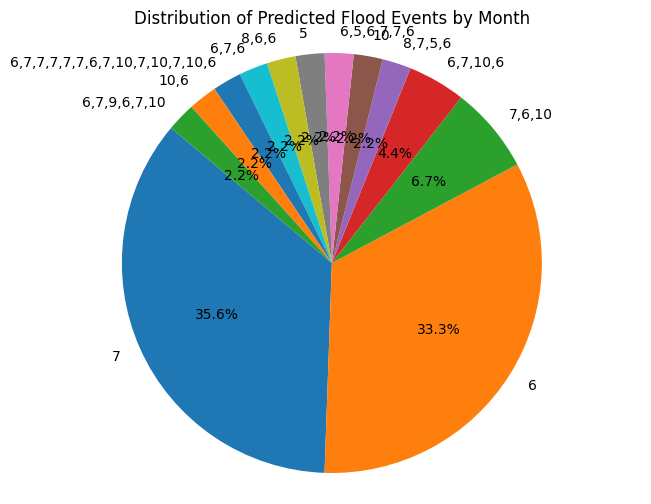

In [29]:
# Example: assuming test_data is your DataFrame with predictions
# Aggregate counts of predicted flood events by month
flood_counts = df['Months'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(flood_counts, labels=flood_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predicted Flood Events by Month')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

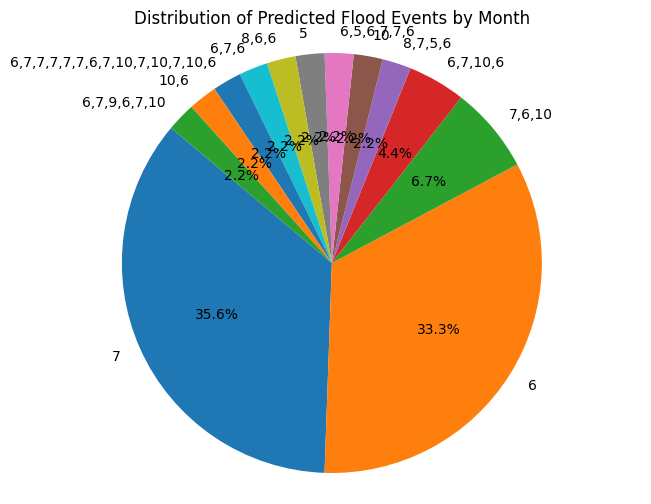

In [30]:
# Example: assuming test_data is your DataFrame with predictions
# Aggregate counts of predicted flood events by month
flood_counts = df[df['Months'].apply(lambda x: isinstance(x, str))]['Months'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(flood_counts, labels=flood_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predicted Flood Events by Month')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

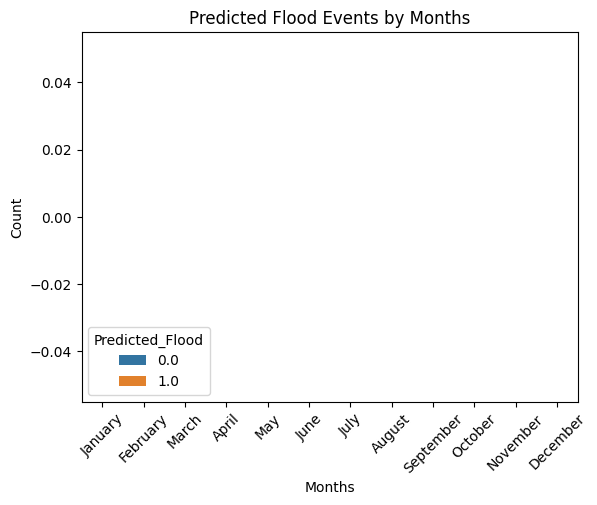

In [31]:
# Example: assuming test_data is your DataFrame with predictions
# Ensure months are unique and not repeated
unique_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']

# Filter and plot based on unique months
filtered_data = df[df['Months'].apply(lambda x: isinstance(x, str))]

# Ensure predicted flood values are within the desired range (0, 1, 2)
filtered_data = filtered_data[filtered_data['Predicted_Flood'].isin([0, 1, 2])]

# Plotting based on unique months
sns.countplot(x='Months', hue='Predicted_Flood', data=filtered_data, order=unique_months)
plt.title('Predicted Flood Events by Months')
plt.xlabel('Months')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

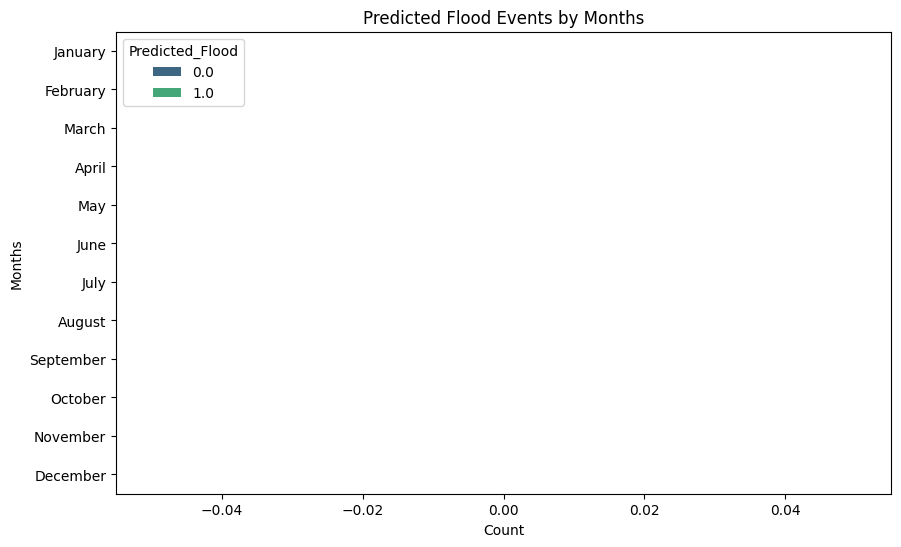

In [33]:
unique_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']

# Filter and plot based on unique months
filtered_data = df[df['Months'].apply(lambda x: isinstance(x, str))]

# Ensure predicted flood values are within the desired range (0, 1, 2)
filtered_data = filtered_data[filtered_data['Predicted_Flood'].isin([0, 1, 2])]

# Plotting based on unique months
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Create the count plot
sns.countplot(y='Months', hue='Predicted_Flood', data=filtered_data, order=unique_months, palette='viridis')

# Set y-axis limits and labels
plt.ylim(len(unique_months)-0.5, -0.5)  # Reverse y-axis order
plt.title('Predicted Flood Events by Months')
plt.xlabel('Count')
plt.ylabel('Months')
plt.show()

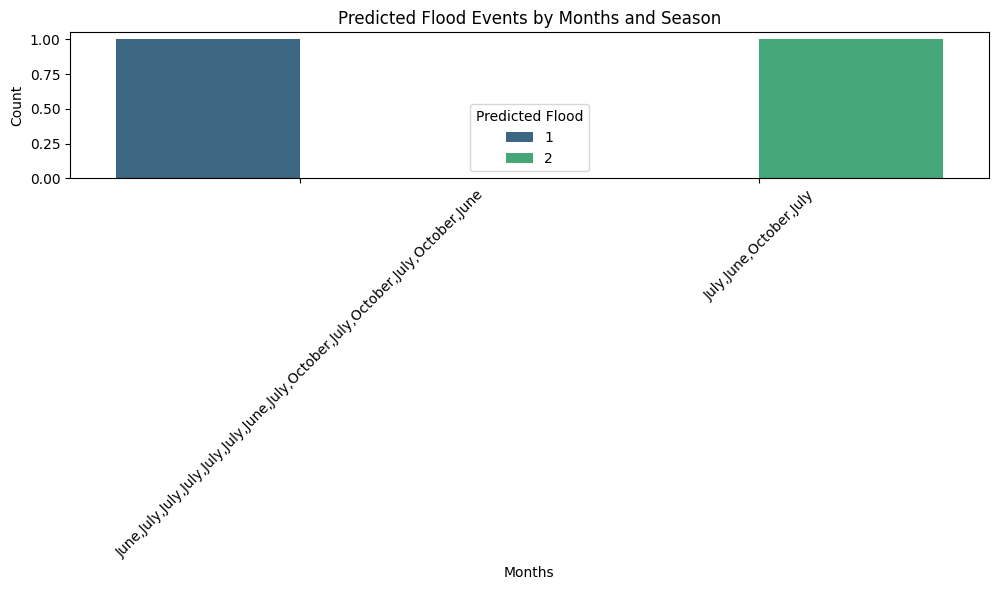

In [35]:
# Example: assuming df is your DataFrame with predictions
# Ensure months are unique and not repeated
unique_months = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Example DataFrame
data = {
    'Months': [[6, 7, 7, 7, 7, 7, 6, 7, 10, 7, 10, 7, 10, 6], [7, 6, 10, 7]],
    'Predicted_Flood': [1, 2]
}

df1 = pd.DataFrame(data)

# Convert list of months to a single month representation
df1['Months'] = df1['Months'].apply(lambda x: ','.join(map(str, x)))

# Map month numbers to names for plotting
df1['Months'] = df1['Months'].apply(lambda x: ','.join([unique_months[int(month)] for month in x.split(',')]))

# Plotting predicted flood events across months and seasons
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Create the count plot
sns.countplot(x='Months', hue='Predicted_Flood', data=df1, palette='viridis')

# Set plot title and labels
plt.title('Predicted Flood Events by Months and Season')
plt.xlabel('Months')
plt.ylabel('Count')
plt.legend(title='Predicted Flood')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


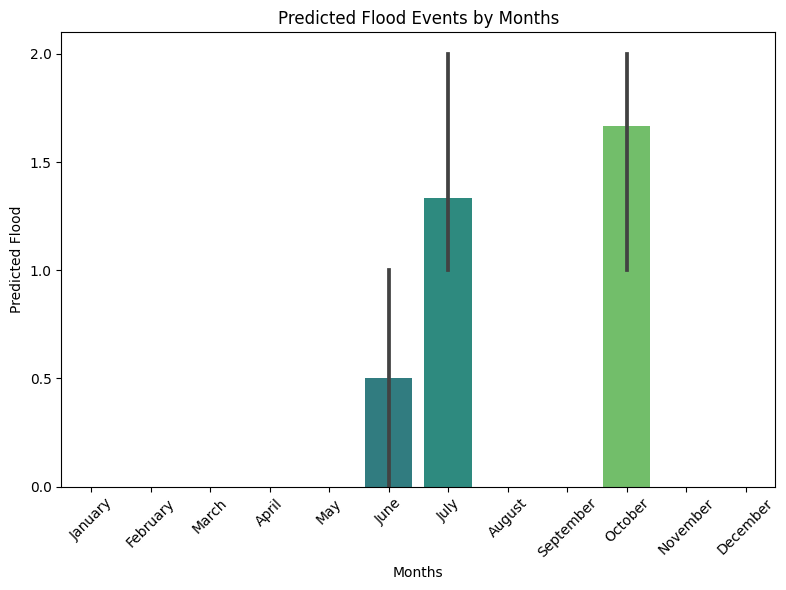

In [37]:
# Example: assuming df is your DataFrame with predictions
# Ensure months are unique and not repeated
unique_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']

# Example DataFrame
data = {
    'Months': ['June', 'July', 'June', 'July', 'July', 'August', 'October', 'October', 'October'],
    'Predicted_Flood': [1, 2, 0, 1, 1, 0, 2, 1, 2]
}

df = pd.DataFrame(data)

# Convert month names to numbers for sorting and plotting
df['Months'] = pd.Categorical(df['Months'], categories=unique_months, ordered=True)

# Plotting based on unique months using barplot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

sns.barplot(x='Months', y='Predicted_Flood', data=df, palette='viridis')

# Set y-axis ticks to 0, 0.5, 1, 1.5, 2
plt.yticks([0, 0.5, 1, 1.5, 2])

# Set plot title and labels
plt.title('Predicted Flood Events by Months')
plt.xlabel('Months')
plt.ylabel('Predicted Flood')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show() 

In [39]:
import folium
# Initialize a Folium map centered around Lagos State
lagos_map = folium.Map(location=[6.5244, 3.3792], zoom_start=10)

# Add markers for each LGA
for index, row in flood_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['LGAs'],
        tooltip=row['LGAs']
    ).add_to(lagos_map)

# Display the map
lagos_map